In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/summer/IMERG_2001_01_2021_12_24h_05x05_summer.nc',0)
lat = data['lat']
lon = data['lon']
pre_summer = data['prec']
mean_summer = np.mean(pre_summer,axis=0)

ntime, nlat, nlon = np.shape(pre_summer)
lon2d, lat2d = np.meshgrid(lon, lat)

data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/autumn/IMERG_2000_12_2021_02_24h_05x05_autumn.nc',0)
pre_autumn = data['prec']
mean_autumn = np.mean(pre_autumn,axis=0)

data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/winter/IMERG_2000_12_2021_02_24h_05x05_winter.nc',0)
pre_winter = data['prec']
mean_winter = np.mean(pre_winter,axis=0)

data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/spring/IMERG_2000_12_2021_02_24h_05x05_spring.nc',0)
pre_spring = data['prec']
mean_spring = np.mean(pre_spring,axis=0)

/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


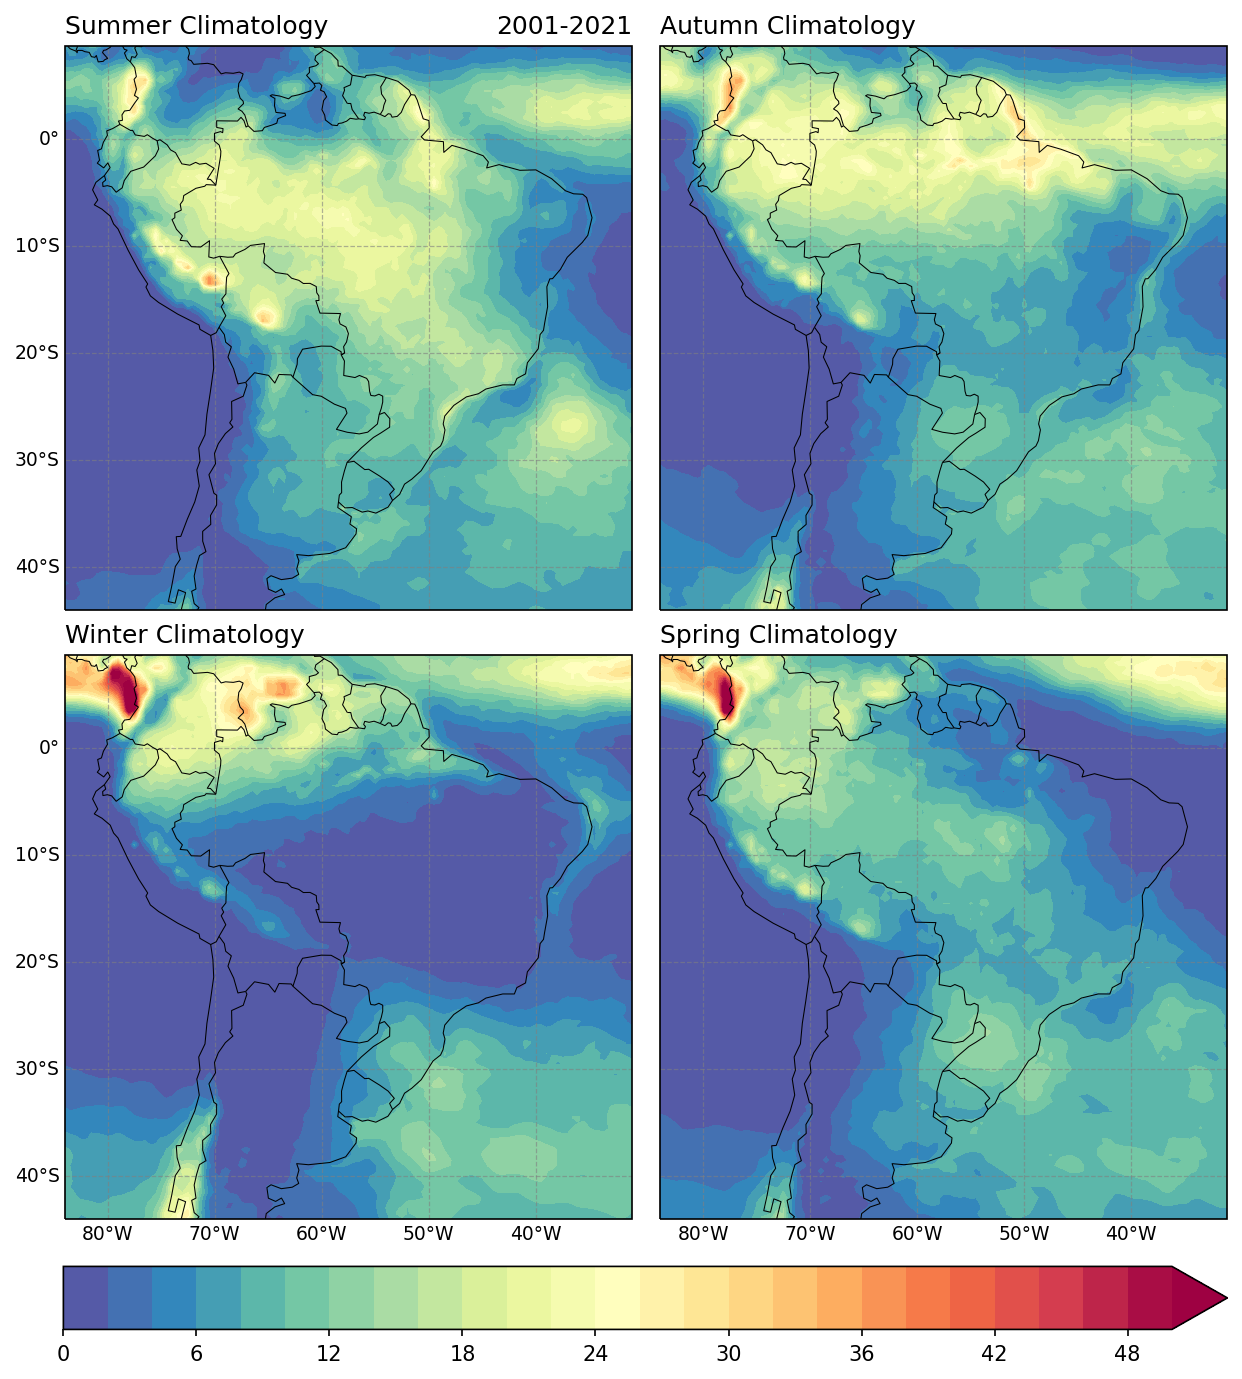

In [3]:
levels = np.arange(0,52,2)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10.5),dpi=150)
gs = gridspec.GridSpec(2,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-84,-31,-41,8])
a1 = ax1.contourf(lon2d,lat2d,mean_summer,cmap=cmap,levels=levels,extend='max')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Summer Climatology',fontsize=12,loc='left')
ax1.set_title('2001-2021',fontsize=12,loc='right')

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-84,-31,-41,8])
a1 = ax1.contourf(lon2d,lat2d,mean_autumn,cmap=cmap,levels=levels,extend='max')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Autumn Climatology',fontsize=12,loc='left')

ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-84,-31,-41,8])
a1 = ax1.contourf(lon2d,lat2d,mean_winter,cmap=cmap,levels=levels,extend='max')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Winter Climatology',fontsize=12,loc='left')

ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-84,-31,-41,8])
a1 = ax1.contourf(lon2d,lat2d,mean_spring,cmap=cmap,levels=levels,extend='max')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}
ax1.set_title('Spring Climatology',fontsize=12,loc='left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.06, 0.776, 0.04]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

salida = '../images/Seasonal_climatology.png'
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)